# Deep Learning Fundamentals 5 - Vanishing/Exploiding Gradient Problem 2

This notebook will be an additional one to the previous notebook and I will talk about some other ways to deal with vanishing/exploiding gradient problem.

## Activation Functions

One of the reason of saturation during training is because of choice of activation function. This is also highlited in 2010 paper by Glorot and Bengio. Even though people used to think there must be a reason that Mother Nature had chosen Sigmoid function for biological neurons, there are function that works better than sigmoid (looks like naturae veritas doesn't work well). Even though, I previously talked about activation functions in the first notebook. I will add some more stuff about these functions in this notebook.

### Sigmoid Function

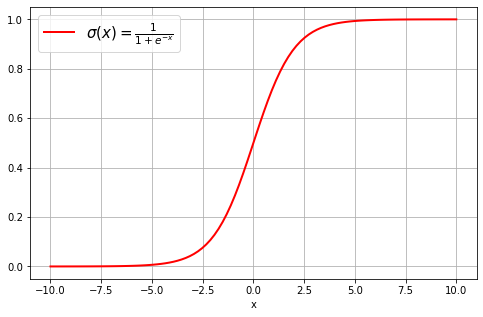

In [1]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-x))
plt.figure(figsize=(8, 5))
plt.grid()
plt.plot(x, sig, "r-", linewidth=2, label=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$")
plt.xlabel("x")
plt.legend(fontsize=15)
plt.show()

### Tangent Hiperbolic Function

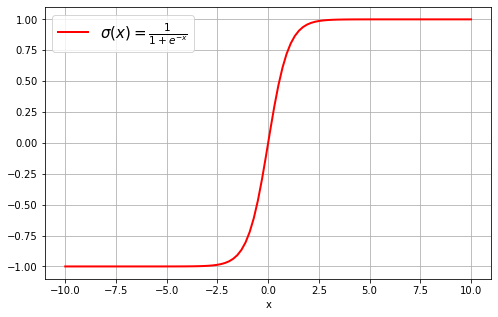

In [2]:
import numpy as np
import matplotlib.pyplot as plt


inputs = np.linspace(-10, 10, 100)
tanh = (np.exp(inputs) - np.exp(-inputs)) / (np.exp(inputs) + np.exp(-inputs))
plt.figure(figsize=(8, 5))
plt.grid()
plt.plot(inputs, tanh, "r-", linewidth=2, label=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$")
plt.xlabel("x")
plt.legend(fontsize=15)
plt.show()

### Rectified Linear Function

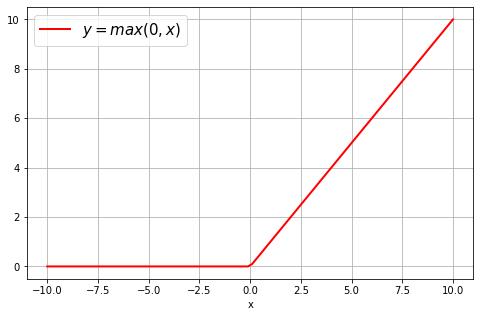

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def ReLU(x):
    return max(0, x)

inputs = np.linspace(-10, 10, 100)
outputs = [ReLU(x) for x in inputs]
plt.figure(figsize=(8,5))
plt.grid()
plt.plot(x, outputs, "r-", linewidth=2, label=r"$y=max\left(0,x\right)$")
plt.xlabel("x")
plt.legend(fontsize=15)
plt.show()

ReLU suffers from a problem called dying ReLU which refers to the situation that during training, the weighted sum of a neuron becomes negative for all instances in the training set and that causes the neuron to only output zeros. These neurons are then called dead because gradient descent becomes ineffective and the gradient of the activation function is zero (since the derivative is zero when the input of ReLu is negative). To cope with that problem, we can use alternatives to ReLU.

### Leaky ReLU Function

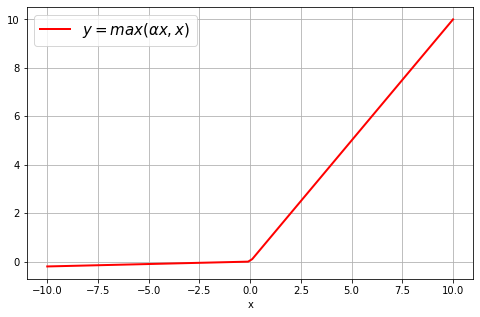

In [4]:
def leaky_ReLU(x):
    return max(0.02*x,x)

inputs = np.linspace(-10, 10, 100)
outputs = [leaky_ReLU(x) for x in inputs]
plt.figure(figsize=(8,5))
plt.grid()
plt.plot(x, outputs, "r-", linewidth=2, label=r"$y=max\left(\alpha x,x\right)$")
plt.xlabel("x")
plt.legend(fontsize=15)
plt.show()

This function is called leaky ReLU. The hyperparameter alpha defines how much the function leaks since it is the slope of the function for $x < 0$. Alpha is generally set to 0.01 because this is enough for neurons not to die during training. In a [paper](https://arxiv.org/pdf/1505.00853.pdf) published in 2015, the authors concluded that the leaky variants always outperform the general ReLU function. In addition, they also concluded that setting alpha to 0.2 seems to work better. Moreover, the authors noted that randomized leaky ReLU (RReLU), the version of leaky ReLU where a is picked randomly in a given range, performed well and act as a regularizer. The paper also evaluated the parametric leaky ReLU(PReLU), where a is set to be learned during training (this parameter is tuned by backpropagation, it is not a hyperparameter), outperforms ReLU on large image datasets but has the risk of overfitting for smaller datasets.

### Exponential Linear Function

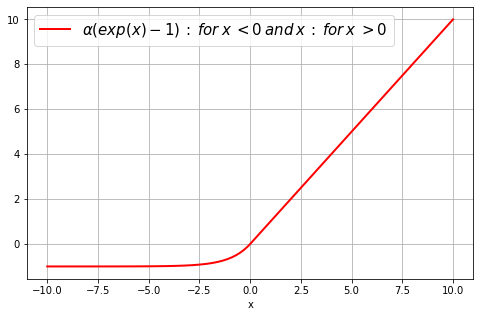

In [5]:
def ELU(x):
    if x > 0 :
        return x
    else : 
        return 1*(np.exp(x)-1)

inputs = np.linspace(-10, 10, 100)
outputs = [ELU(x) for x in inputs]
plt.figure(figsize=(8,5))
plt.grid()
plt.plot(x, outputs, "r-", linewidth=2,label=r"$\alpha \left(exp\left(x\right)-1\right)\::\:for\:x\:<0 \: and\:x\::\:for\:x\:>0$ ")
plt.xlabel("x")
plt.legend(fontsize=15)
plt.show()

In a [paper](https://arxiv.org/pdf/1511.07289.pdf) publiched in 2015 authors proposed a new activation function called ELU which outperformed all the ReLU variants compared in the paper. The function has the following properties :

1. The hyperparameter alpha defines the value that the ELU function approaches as z is becoming large negative number. Since the function has negative values for z < 0, the unit has an output close to zero that get on top of the vanishing gradients problem.
2. The function has a nonzero gradient for z < 0 which makes it robust againist dead neuron problem of ReLU.
3. If alpha is equal to 1 then the function is smooth everywhere, this sepeeds up optimization algorithm.

On the other hand, ELU has the disadvantage of being slower to compute because of being an exponential function. It has a faster convergence rate during training which generally compensates for slow computation, however, it is generally slower compared to ReLU.

### Scaled ELU Function

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


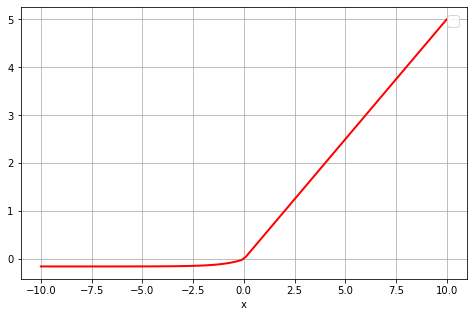

In [6]:
def SELU(x, alpha = 0.3, scale = 0.5):      
    return np.where(x <= 0, scale * alpha * (np.exp(x) - 1), scale *x)

inputs = np.linspace(-10, 10, 100)
outputs = [SELU(x) for x in inputs]
plt.figure(figsize=(8,5))
plt.grid()
plt.plot(x, outputs, "r-", linewidth=2)
plt.xlabel("x")
plt.legend(fontsize=15)
plt.show()

In 2017 a scaled version of ELU has been introduced in the [paper](https://arxiv.org/pdf/1706.02515.pdf). The scaled version will self-normalize the network if the neural network is composed of exclusive number of DNNs, and if all hidden layers use SELU. This effect of self-normalization results the output of each layer to have a mean of zero and standard deviation of one which overcomes the problem of vanishing/exploiding gradients. For self-normalization to occur, the following properties must be met
1. The input features must be standardized.
2. The weights must be initialized with LeCun normal initialization.
3. The network must have a sequential architecture (It doesn't work with RNN or skip connections), otherwise the self-normalization is not guaranteed.
4. Lastly, the layers must be dense. However, some researchers argue that the SELU activation function can improve performance of CNN.

SELU often outperforms other activation functions if the conditions above are met.

### Gamma Error Linear Function

Lastly, Gamma ELU is a highly used activation function for applications of NLP and transformers (it is also used in BERT).

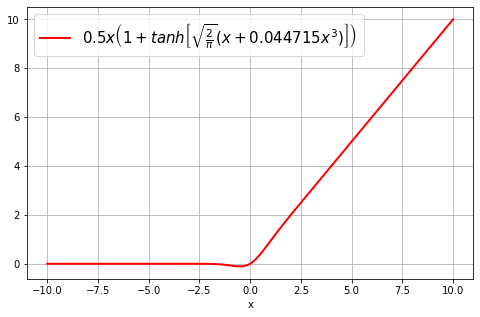

In [7]:
import tensorflow as tf
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
def gelu(x):
    return 0.5 * x * (1 + tanh(np.sqrt(np.pi / 2) * (x + 0.044715 * np.power(x,3))))

inputs = np.linspace(-10, 10, 100)
outputs = [gelu(x) for x in inputs]
plt.figure(figsize=(8,5))
plt.grid()
plt.plot(x, outputs, "r-", linewidth=2,label=r"$0.5x\left(1+tanh\left[\sqrt{\frac{2}{\pi }}\left(x+0.044715x^3\right)\right]\right)$")
plt.xlabel("x")
plt.legend(fontsize=15)
plt.show()

### Additional Sources

1. I took codes for SELU from this medium article [SELU and ELU — Exponential Linear Units](https://medium.com/@neuralthreads/selu-and-elu-exponential-linear-units-a826d5eeb99c)
2. This is a very good article about activation functions: [Activation Functions Explained](https://mlfromscratch.com/activation-functions-explained/#/)
3. Machine Learning Mastery has good articles for activation functions : [How to Choose an Activation Function for Deep Learning](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/#:~:text=An%20activation%20function%20in%20a,a%20layer%20of%20the%20network.) [A Gentle Introduction to the Rectified Linear Unit (ReLU)](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) [How to Fix the Vanishing Gradients Problem Using the ReLU](https://machinelearningmastery.com/how-to-fix-vanishing-gradients-using-the-rectified-linear-activation-function/)
4. For more about GELU [On the GELU Activation Function](https://alaaalatif.github.io/2019-04-11-gelu/)
5. This article also includes derivations of activation functions [Activation Functions](https://maelfabien.github.io/deeplearning/act/#sigmoid)
6. There is another article about advantages and disadvantages of ReLU: [link](https://vidyasheela.com/post/what-are-the-advantages-and-disadvantages-of-relu-activation-function)
7. This medium article has a good explanation for the basic activation functions [Activation Functions in Neural Networks](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)

# Batch Normalization

Another technique that we can use for dealing with vanishing/exploiding gradient problem is batch normalization. Batch Normalization is an operation that zero-centers and normalizes each input, then scales and shifts the result by using two parameters gamma and beta. We do this operation before or after the activation function for every layer (in the original paper, it was done before the activation function). The complete batch normalization algorithm is summarized in the picture below.

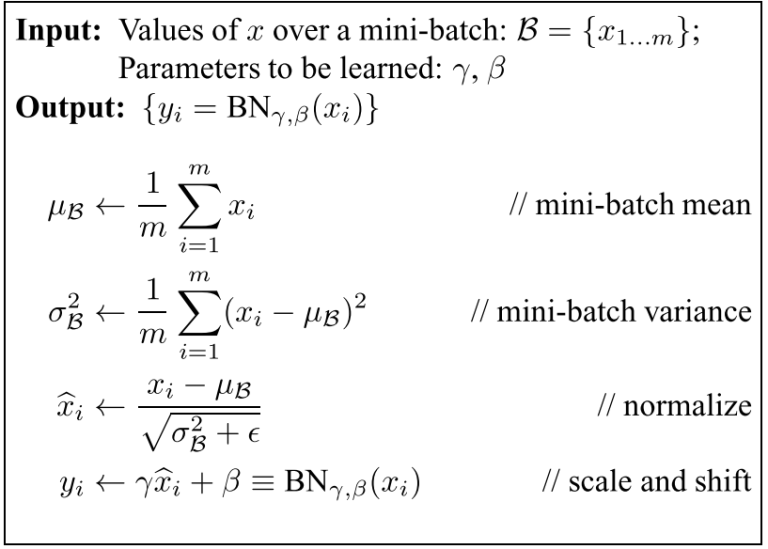

Batch normalization strongly reduces the vanishing/exploding gradient problem so much that Ioffe and Szegedy argued that they could even use saturating activation functions, in addition, the networks become much less sensitive to the weight initialization. The procedure let the authors be able to use much larger learning rates as well. The below lines were noted.

* Applied to a state-of-the-art image classification model, Batch Normalization achieves the same accuracy with 14 times fewer training steps, and beats the original model by a significant margin. Using an ensemble of batch-normalized networks, we improve upon the best published result on ImageNet classification: reaching 4.9% top-5 validation error (and 4.8% test error), exceeding the accuracy of human raters. - [Géron, A. (2019)](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

Moreover, since each mini-batch is scaled by the mean and variance this procedure adds noise to the activation function/linear predictor in each batch. This noise adds some regularization effect to hidden layers (this regularization effect is slight and gets even lighter when the batch size is large). However, the batch normalization also adds some complexity to the model and it adds a runtime penalty which makes predictions slower because of the extra computations (there are ways to deal with this runtime penalty).

The batch normalization in some cases makes the prediction harder especially when we have a few instances for prediction because it is hard to compute the mean and variance with this number of instances. We may even have one instance for prediction. In a situation like that, we can use the estimated mean and variance for the training set. Keras estimates the final statistics during training by using a moving average which provides us a way to deal with the drawback of batch normalization.


If you add a Batch Normalization layer as the first layer, you do not need to standardize your training set.

I actually altered the three layer neural network to add batch normalization when I was taking the Deep Learning course around a year ago. However, I could not find it even though I look through all the files. Hence, I addedsome helpful links that I found about implementation of batch normalization for those who may want to try implementing it from scratch.


### Sources for Batch Normalization:
1. In this repository you can find an implementation of Batch Normalization with DNN : [link](https://github.com/narayana8799/Batch-Norm-from-scratch)
2. In these articles, there are a good explanation about Batch Normalization as well as mathematics and implementation of it : 

      [Training Deep Neural Networks with Batch Normalization](https://zaffnet.github.io/batch-normalization) 

      [Implementing Batch Normalization in Python](https://towardsdatascience.com/implementing-batch-normalization-in-python-a044b0369567) 

      [Deriving the Gradient for the Backward Pass of Batch Normalization](https://kevinzakka.github.io/2016/09/14/batch_normalization/) 

      [BatchNorm Layer - Understanding and eliminating Internal Covariance Shift](https://deepnotes.io/batchnorm)


3. This article is similar to those above, however, it has a better very good graphical representation [Understanding the backward pass through Batch Normalization Layer](https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html)